In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.optimize import minimize, Bounds
import random 
import string
from pybacktestchain.data_module import get_stocks_data, get_stock_data, UNIVERSE_SEC

In [79]:
def generate_random_ticker(n):
    res=[]
    for i in range(n):
        res.append(random.choice(UNIVERSE_SEC))
    return res

In [80]:
def get_N_valid_tickers(N, start_date, end_date):
    """Generate N valid stock tickers by retrying until enough valid ones are found."""
    valid_tickers = set()  # Use a set to ensure uniqueness

    while len(valid_tickers) < N:
        remaining_needed = N - len(valid_tickers)
        
        # Generate new random tickers
        new_tickers = generate_random_ticker(remaining_needed)
        
        # Try to fetch valid tickers
        try:
            df = get_stocks_data(new_tickers, start_date, end_date)
            
            if not df.empty:
                found_tickers = set(df['ticker'].unique())  # Extract tickers that returned data
                valid_tickers.update(found_tickers)  # Add only valid ones
                
            print(f"Current valid tickers: {valid_tickers}")

        except Exception as e:
            print(f"Error fetching stock data: {e}")

    return list(valid_tickers)  # Convert set to list

# Example Usage
N = 4
start_date = '2010-01-01'
end_date = '2025-01-01'

tickers = get_N_valid_tickers(N, start_date, end_date)
print(f"Final valid tickers: {tickers}")


Current valid tickers: {'COMM', 'GRMN', 'SCNI', 'SF'}
Final valid tickers: ['COMM', 'GRMN', 'SCNI', 'SF']


In [81]:
N = 4
tickers=get_N_valid_tickers(N, start_date, end_date)
start_date = '2023-11-15'
end_date = '2025-01-16'
data=get_stocks_data(tickers,start_date,end_date).groupby(['Date','ticker'])['Close'].sum().unstack('ticker')
data

Current valid tickers: {'FXC', 'MVCO', 'AVAL', 'CTMX'}


ticker,AVAL,CTMX,FXC,MVCO
Date,,,,
2023-11-15 00:00:00-05:00,2.280,1.290,71.480003,0.000889
2023-11-16 00:00:00-05:00,2.260,1.290,71.120003,0.000849
2023-11-17 00:00:00-05:00,2.220,1.320,71.360001,0.000948
2023-11-20 00:00:00-05:00,2.170,1.390,71.309998,0.001000
2023-11-21 00:00:00-05:00,2.190,1.305,71.440002,0.001100
...,...,...,...,...
2025-01-08 00:00:00-05:00,2.150,0.983,67.940002,0.001400
2025-01-10 00:00:00-05:00,2.180,0.880,67.750000,0.001200
2025-01-13 00:00:00-05:00,2.160,0.887,67.879997,0.001100


In [82]:
#data = pd.read_csv('data.csv')
# data without header, and with index named "Date"

#data_fx=pd.read_csv('data_fx.csv')
#same config as data

data=data.dropna(axis=0)
#data=data.join(data_fx,how='left')

data=data.ffill()
data.index=pd.to_datetime(data.index)

In [83]:
get_stock_data("SOFR",'2023-11-15',"2025-01-01")

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2023-11-15 00:00:00-05:00,100.040001,100.040001,100.040001,100.040001,94.628685,495200,SOFR
1,2023-11-16 00:00:00-05:00,100.099998,100.099998,100.099998,100.099998,94.685440,100,SOFR
2,2023-11-17 00:00:00-05:00,100.150002,100.160004,100.135002,100.135002,94.718552,500,SOFR
3,2023-11-20 00:00:00-05:00,100.169998,100.169998,100.139999,100.139999,94.723282,200,SOFR
4,2023-11-21 00:00:00-05:00,100.139999,100.180000,100.139999,100.180000,94.761108,200,SOFR
...,...,...,...,...,...,...,...,...
278,2024-12-24 00:00:00-05:00,100.510002,100.514999,100.489998,100.514999,100.128197,1200,SOFR
279,2024-12-26 00:00:00-05:00,100.525002,100.570000,100.525002,100.567001,100.180000,3700,SOFR
280,2024-12-27 00:00:00-05:00,100.180000,100.190002,100.169998,100.190002,100.190002,8500,SOFR
281,2024-12-30 00:00:00-05:00,100.180000,100.190002,100.180000,100.190002,100.190002,1300,SOFR


In [84]:
data.index

DatetimeIndex(['2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00',
               '2023-11-21 00:00:00-05:00', '2023-11-22 00:00:00-05:00',
               '2023-11-24 00:00:00-05:00', '2023-11-27 00:00:00-05:00',
               '2023-11-28 00:00:00-05:00', '2023-11-29 00:00:00-05:00',
               ...
               '2024-12-31 00:00:00-05:00', '2025-01-02 00:00:00-05:00',
               '2025-01-03 00:00:00-05:00', '2025-01-06 00:00:00-05:00',
               '2025-01-07 00:00:00-05:00', '2025-01-08 00:00:00-05:00',
               '2025-01-10 00:00:00-05:00', '2025-01-13 00:00:00-05:00',
               '2025-01-14 00:00:00-05:00', '2025-01-15 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=292, freq=None)

In [85]:
rate = get_stock_data("SOFR",'2023-11-15',"2025-01-16")
rate.index=pd.to_datetime(rate.Date)
rate=rate.reindex(data.index.to_list()).ffill()
rate=rate[["Close"]]
rate

,Close
Date,
2023-11-15 00:00:00-05:00,100.040001
2023-11-16 00:00:00-05:00,100.099998
2023-11-17 00:00:00-05:00,100.135002
2023-11-20 00:00:00-05:00,100.139999
2023-11-21 00:00:00-05:00,100.180000
...,...
2025-01-08 00:00:00-05:00,100.310997
2025-01-10 00:00:00-05:00,100.345001
2025-01-13 00:00:00-05:00,100.355003


In [86]:
VT=0.1
min_w=0
max_w=0.5

In [87]:
# N = number of underlyings
COV_mat=np.zeros((N,N,data.shape[0]),dtype=float) # covariance matrix

Weights=np.zeros((N,data.shape[0]))

In [88]:
#date=
t_start=252//4
IL_vect=np.zeros((data.shape[0]))
IL_vect[:t_start+22]=100
Exp_vect=np.zeros((data.shape[0]))
Exp_vect[:t_start+22]=1.2
Basket_vect=np.zeros((data.shape[0]))
Basket_vect[:t_start+1]=100
HV_vect=np.zeros((data.shape[0]))
t_rebal=np.zeros((data.shape[0]))

In [89]:
DCF=pd.Series(((pd.DataFrame(data.index)-pd.DataFrame(data.index).shift(1)).iloc[:,0].dt.days).values)

In [90]:
return_mat=np.log(data/data.shift(1)).multiply(np.sqrt(252/DCF).values,axis=0)
return_mat

ticker,AVAL,CTMX,FXC,MVCO
Date,,,,
2023-11-15 00:00:00-05:00,NaN,NaN,NaN,NaN
2023-11-16 00:00:00-05:00,-0.139864,0.000000,-0.080152,-0.730832
2023-11-17 00:00:00-05:00,-0.283481,0.364948,0.053479,1.750884
2023-11-20 00:00:00-05:00,-0.208782,0.473581,-0.006424,0.489427
2023-11-21 00:00:00-05:00,0.145639,-1.001693,0.028914,1.513001
...,...,...,...,...
2025-01-08 00:00:00-05:00,-0.146987,-0.586544,-0.037340,2.184671
2025-01-10 00:00:00-05:00,0.155545,-1.242461,-0.031436,-1.730336
2025-01-13 00:00:00-05:00,-0.084472,0.072616,0.017569,-0.797473


In [91]:
rate

,Close
Date,
2023-11-15 00:00:00-05:00,100.040001
2023-11-16 00:00:00-05:00,100.099998
2023-11-17 00:00:00-05:00,100.135002
2023-11-20 00:00:00-05:00,100.139999
2023-11-21 00:00:00-05:00,100.180000
...,...
2025-01-08 00:00:00-05:00,100.310997
2025-01-10 00:00:00-05:00,100.345001
2025-01-13 00:00:00-05:00,100.355003


In [92]:
def IL(t):
    return IL_vect[t-1]*(1+Exp_vect[t-1]*(Basket_vect[t]/Basket_vect[t-1]-1-rate.iloc[t-1]["Close"]/10000*DCF[t]))

def BL(t):
    return Basket_vect[t-1]*np.sum([Weights[i,t]*(data.iloc[t,i]/data.shift(1).iloc[t,i]) for i in range(N)])

def HV(t):
    return np.sqrt(252*np.mean([np.log(Basket_vect[h]/Basket_vect[h-1])**2 for h in range(t-20,t)]))

def expo(t):
    return min(VT/HV(t-2),1.2)

def covar():
    return return_mat.cov()

In [93]:
COV_mat=covar()

In [94]:
def fun_opt(W,R):
    return (-1)*np.dot(W,R)

def contrainte(W,cov):
    return VT - np.sqrt(np.dot(np.dot(W.T,cov),W))

In [95]:
x0=np.array([1/N for i in range(N)])
a=1
b=2
def W(t):
    cons=({'type':'ineq','fun':lambda W:1 -  np.sum([W[i] for i in range(a)])},
          {'type':'ineq','fun':lambda W:1 -  np.sum([W[i] for i in range(a,b)])},
          {'type':'ineq','fun':lambda W:1 -  np.sum([W[i] for i in range(b,N)])},
         # {'type':'ineq','fun':contrainte, 'args': COV_mat[:,:,t]},
          {'type':'eq','fun':lambda W : np.sum(W)-1},
          )
    bonds=Bounds(lb=np.array([min_w for i in range(N)]),ub=np.array([max_w for i in range(N)]))
    res=minimize(fun_opt,x0, bounds=bonds, args=return_mat.to_numpy()[t,:], constraints=cons)
    return res.x

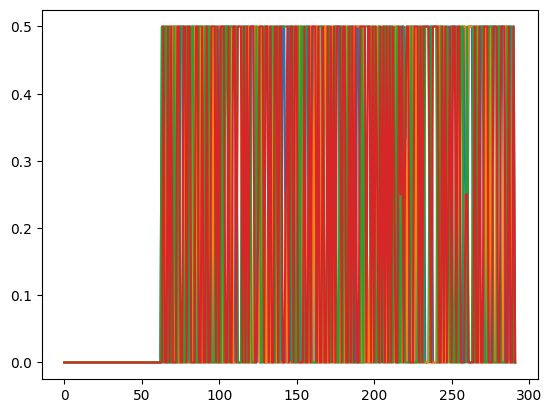

In [96]:
for t in range(252//4,return_mat.shape[0]-1):
    Weights[:,t]=W(t)
    
plt.plot(Weights.T)

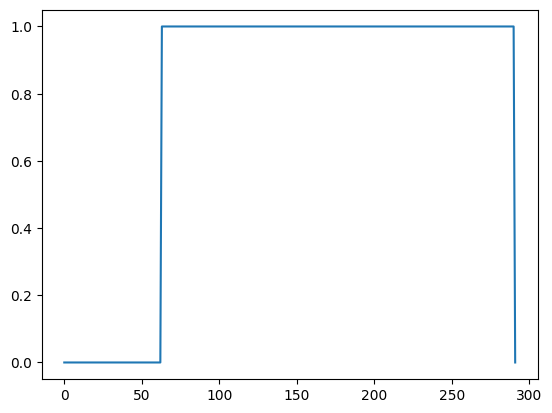

In [97]:
plt.plot(Weights.sum(axis=0))

In [98]:
for t in range(t_start,return_mat.shape[0]-1):
    Basket_vect[t]=BL(t)

for t in range(t_start+20,t_start+23):
    HV_vect[t]=HV(t)
    
for t in range(t_start+22,return_mat.shape[0]-1):
    Exp_vect[t]=expo(t)
    IL_vect[t]=IL(t)

1.0093301856337142
1.0941176819699931
1.006389383291299
1.0113115304212126
1.006756750225934
1.0501380141564722
1.2400000298638936
1.064444435967336
0.9982395001971254
1.048721466357925
1.0169811152698909
1.1129156767699144
1.0049669650763768
0.9993288095501992
1.0049504665355695
1.0882068998353063
0.9839310635395078
1.1586531583166146
1.0021929803922673
1.0019431572070263
1.0142303357189872
1.0463913057418952
1.0714896307831596
1.0045045001506225
0.9994670258581764
1.0080822189217202
1.0685580703544624
1.0256838362589595
1.0124477244963779
1.0370512006669426
1.011355596548303
1.0036543902563935
1.0306624247170166
1.0060975363040108
1.2200988194157356
1.0189286464017198
1.091731131391923
1.0159533869464852
1.0589285508257213
0.9995774877750803
1.0020920481222444
0.9976694567919596
0.9938381914313716
1.0906526718468104
1.0120482761334333
1.00425345719293
0.9988135247739138
1.0065110350929811
1.0078800495475282
1.0240670861476926
1.0630781230486317
2.103484800308073
1.0049857501102628
0.

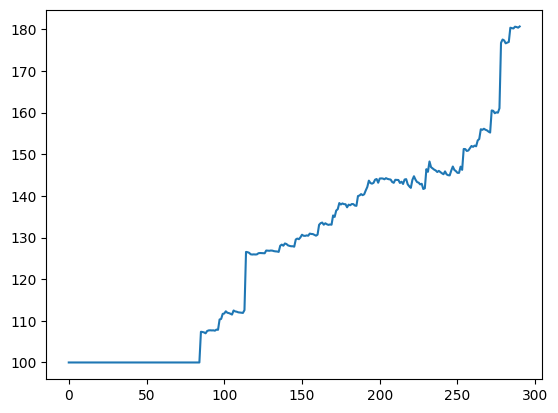

In [100]:
results=IL_vect*100/IL_vect[t_start]
plt.plot(results[:-1])